Tasks
1. Perform different regression algorithms and select the best performing model based on the appropriate metric
2. Use the best model in grid search to find the optimal parameter values 
3. Fit the data with the model that has the optimal parameters. 

In [1]:
import pandas as pd 

In [2]:
data=pd.read_csv('C:/Users/turki/Documents/google_PS.csv')

In [3]:
data=data.drop(columns=['Last Updated'], axis=1)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7729 entries, 0 to 7728
Data columns (total 9 columns):
App               7729 non-null object
Category          7729 non-null object
Rating            7729 non-null float64
Reviews           7729 non-null int64
Size              7729 non-null float64
Installs          7729 non-null int64
Type              7729 non-null object
Price             7729 non-null float64
Content Rating    7729 non-null object
dtypes: float64(3), int64(2), object(4)
memory usage: 543.6+ KB


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
#Select the categorical data
cat_data=data.select_dtypes(include=['object'])

In [8]:
cat_data.head()

,App,Category,Type,Content Rating
0,Photo Editor Candy Camera Grid ScrapBook,ART_AND_DESIGN,Free,Everyone
1,Coloring book moana,ART_AND_DESIGN,Free,Everyone
2,U Launcher Lite FREE Live Cool Themes Hid...,ART_AND_DESIGN,Free,Everyone
3,Sketch Draw Paint,ART_AND_DESIGN,Free,Teen
4,Pixel Draw Number Art Coloring Book,ART_AND_DESIGN,Free,Everyone


In [9]:
cat_data.describe(include=['object'])

,App,Category,Type,Content Rating
count,7729,7729,7729,7729
unique,7005,33,2,6
top,ROBLOX,FAMILY,Free,Everyone
freq,9,1617,7150,6172


In [10]:
cat_data=cat_data.drop('App', axis=1)

In [11]:
cat_data.head()

,Category,Type,Content Rating
0,ART_AND_DESIGN,Free,Everyone
1,ART_AND_DESIGN,Free,Everyone
2,ART_AND_DESIGN,Free,Everyone
3,ART_AND_DESIGN,Free,Teen
4,ART_AND_DESIGN,Free,Everyone


In [12]:
# Create indicator or dummy variables
encoded_data=pd.get_dummies(cat_data)

In [13]:
encoded_data.head()

,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,...,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Free,Type_Paid,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [14]:
encoded_data.shape

(7729, 41)

In [15]:
#Select the numerical data 
numerics=['float64', 'int64']
num_data=data.select_dtypes(include=numerics)

In [16]:
num_data.head()

,Rating,Reviews,Size,Installs,Price
0,4.1,159,19.0,10000,0.0
1,3.9,967,14.0,500000,0.0
2,4.7,87510,8.7,5000000,0.0
3,4.5,215644,25.0,50000000,0.0
4,4.3,967,2.8,100000,0.0


In [17]:
# Standardize and fit -transform the numerical data
scaler=StandardScaler()
scaled_df=scaler.fit_transform(num_data)
scaled_df=pd.DataFrame(scaled_df, columns=num_data.columns)

In [18]:
scaled_df.head()

,Rating,Reviews,Size,Installs,Price
0,-0.135625,-0.158077,-0.195549,-0.167701,-0.064805
1,-0.502916,-0.157643,-0.249023,-0.157928,-0.064805
2,0.966248,-0.111192,-0.305705,-0.068170,-0.064805
3,0.598957,-0.042418,-0.131380,0.829402,-0.064805
4,0.231666,-0.157643,-0.368805,-0.165906,-0.064805


In [19]:
preprocessed_data=pd.merge(encoded_data, scaled_df, how='outer', left_index=True, right_index=True)

In [20]:
preprocessed_data.head()

,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,...,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Rating,Reviews,Size,Installs,Price
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,-0.135625,-0.158077,-0.195549,-0.167701,-0.064805
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,-0.502916,-0.157643,-0.249023,-0.157928,-0.064805
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0.966248,-0.111192,-0.305705,-0.068170,-0.064805
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0.598957,-0.042418,-0.131380,0.829402,-0.064805
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0.231666,-0.157643,-0.368805,-0.165906,-0.064805


In [21]:
# Define the predictors and the target variable
X=preprocessed_data.drop('Rating', axis=1)
y=preprocessed_data['Rating']

In [22]:
#Split the data 
X_train, X_test,y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=123)

In [23]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5796, 45) (1933, 45) (5796,) (1933,)


# Modeling 

The target variable 'Rating' is a continuous variable. Therefore, we utilize regression algorithms to predict rating. 
The variables that we have as estimators are :
    
    
    1. Category
    
    2. Content Rating
    
    3. Type
    
    4. Installs
    
    5. Reviews 
    
    6. Price
    
    7. Size

In [24]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Linear Regression 

In [25]:
reg=LinearRegression()
model_lr=reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)

In [26]:
#R-square for test data
R2_lr_test=model_lr.score(X_test, y_test)

In [27]:
#R-square for training data
R2_lr_train=model_lr.score(X_train, y_train)

In [28]:
MSE_lr=np.sqrt(mean_squared_error(y_test,y_pred))
print(MSE_lr)

50244075317.27793


In [29]:
#Cross Validation 
reg_cv=cross_val_score(reg, X_train,y_train, cv=5)
print(reg_cv.mean())

-9.321377594270427e+18


# Random Forest Regressor 

In [30]:
rf=RandomForestRegressor(n_estimators=8, min_samples_leaf=0.12)
model_rf=rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)


In [31]:
MSE_rf=np.sqrt(mean_squared_error(y_test,y_pred_rf))
print(MSE_rf)

0.9785687209807975


In [32]:
R2_rf_test=model_rf.score(X_test,y_test)

In [33]:
R2_rf_train=model_rf.score(X_train,y_train)

In [34]:
#Cross Validation 
rf_cv=cross_val_score(rf,X_train,y_train, cv=5)
print('The mean score : {:.2f}'.format(rf_cv.mean()))

The mean score : 0.05


# Decision Tree Regressor 

In [35]:
dt=DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.14)
model_dt=dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)

In [36]:
R2_dt_test=model_dt.score(X_test,y_test)

In [37]:
R2_dt_train=model_dt.score(X_train,y_train)

In [38]:
MSE_dt=np.sqrt(mean_squared_error(y_test,y_pred_dt))
print(MSE_dt)

0.9751622319915878


In [39]:
dt_cv=cross_val_score(dt,X_train,y_train, cv=5)
print('The mean score : {:.2f}'.format(dt_cv.mean()))

The mean score : 0.05


# Results 

In [40]:
results={'R-square_test':[R2_lr_test,R2_rf_test,R2_dt_test], 'R-square_train':[R2_lr_train,R2_rf_train,R2_dt_train],'MSE':[MSE_lr,MSE_rf,MSE_dt], 'Cv_scores':[0,rf_cv.mean(),dt_cv.mean()]}
results

{'R-square_test': [-2.4923402803789174e+21,
  0.054589807325927886,
  0.06116047295435234],
 'R-square_train': [0.04161682975919667,
  0.05462523840597577,
  0.062468916082508597],
 'MSE': [50244075317.27793, 0.9785687209807975, 0.9751622319915878],
 'Cv_scores': [0, 0.05092437815305824, 0.05414178924376174]}

In [41]:
pd.options.display.float_format = '{:.5f}'.format
Model=['Linear Regression', 'Random Forest', 'Decision Tree']
Results=pd.DataFrame(results)
Results.index=Model
Results.index.name="Model"
Results 

,R-square_test,R-square_train,MSE,Cv_scores
Model,,,,
Linear Regression,-2492340280378917388288.00000,0.04162,50244075317.27793,0.00000
Random Forest,0.05459,0.05463,0.97857,0.05092
Decision Tree,0.06116,0.06247,0.97516,0.05414


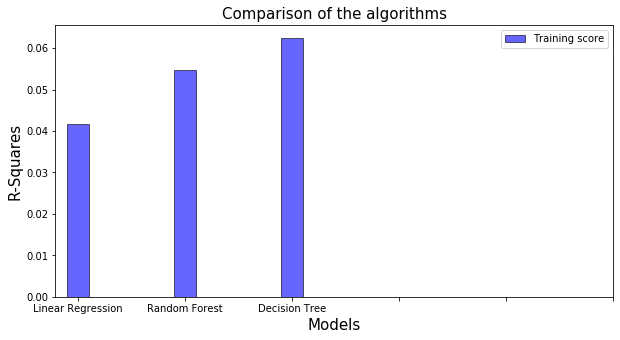

In [42]:
index=[1,2,3]
plt.figure(figsize=(10,5))
plt.xlabel('Models',fontsize=15)
plt.ylabel ('R-Squares',fontsize=15)
plt.title('Comparison of the algorithms',fontsize=15)
plt.bar(index,Results['R-square_train'],color='b',alpha=0.6,label='Training score',edgecolor='k',width=0.2)
plt.xticks([1, 2,3,4,5,6], labels=Results.index)
plt.legend()
plt.savefig("27.png")
plt.show()

Random forest and Decison Tree regressors seem better options since they achieve positive R-square values on the test data. The R-suare of Decision Tree Regressor(0.06116) is slightly higher than that of Random Forest Regressor (0.05648). Thus, we choose Decision Tree Regressor for hyperparameter tuning. 

# Parameter Tuning with GridSearchCv

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
dt=DecisionTreeRegressor()
param_grid={'max_depth':[5,50,100,200,400], 'min_samples_leaf':[0.1,0.12,0.14]}
gs_dt=GridSearchCV(dt,param_grid=param_grid,cv=5, n_jobs=-1)
gs_dt.fit(X_train,y_train)
y_pred_gs=gs_dt.predict(X_test)
print(gs_dt.best_estimator_)
print(gs_dt.best_score_)

DecisionTreeRegressor(criterion='mse', max_depth=100, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=0.1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
0.05707858014025706


# Decision Tree Regressor with optimal parameters 

In [45]:
dt_best=DecisionTreeRegressor(criterion='mse', max_depth=100, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=0.1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
dt_best.fit(X_train, y_train)
y_pred_best=dt_best.predict(X_test)
cv_dt_best=cross_val_score(dt_best, X_train,y_train, cv=5)
print('The mean CV score: {:.3f}'.format(cv_dt_best.mean()))
print(dt_best.score(X_test,y_test))
print(dt_best.score(X_train,y_train))

The mean CV score: 0.057
0.0622602690613685
0.06646349105160976


Based on the R-square values(best R-square=6.7%), we can see that the regression algorithms above perform very poorly on the data. The major reason of poor performance is that 'Rating' is very weakly correlated with the other variables. Therefore, we suggest that a new data set with different estimator variables should be considered. 